# Ford bike Data Exploration

## Preliminary Wrangling

This document explores a dataset containing users of a bike platform and their attributes.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import date

%matplotlib inline

In [ ]:
# Read in the csv file
ford = pd.read_csv('fordtrip.csv',parse_dates=['start_time','end_time'])
# print few entries from the data
ford.head()
# print number of rows and columns
ford.shape

(183412, 16)

In [ ]:
# print structure of the data
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [ ]:
# check for missing values
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [ ]:
# check duplicated entries
ford.duplicated().sum()

0

In [ ]:
# statistical summary of numerical columns
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**Data Cleaning**
I will be cleaning some of the columns needed for exploration.

## Cleaning 1
> Extract time and day ride started

In [ ]:
# create a new column that shows hour bike ride started
ford['hour_start'] = ford['start_time'].dt.hour
# create a new column that shows the day bike ride started
ford['start_day'] = ford['start_time'].dt.weekday


## Cleaning 2
> Convert duration in seconds to minutes

In [ ]:
# convert duration from seconds to minutes
ford['duration_in_minutes'] = ford['duration_sec']/60

## Cleaning 3
Calculate age using member birth year

In [ ]:
# calculate age as at 2019
def age(member_birth_year):
    return date.today().year - member_birth_year -3
ford['age'] = ford['member_birth_year'].apply(age)

## Cleaning 4 
> Drop columns not needed for exploration

## Test Changes

In [ ]:
# check for changes
ford.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour_start,start_day,duration_in_minutes,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,3,869.750000,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,3,708.683333,NaN


## Cleaning 5
> Fill missing values in age column

In [ ]:
# fill missing values with mean
ford['age'] = ford['age'].fillna(ford['age'].mean())

## Test changes


In [ ]:
# test changes in age column
ford.age.isnull().sum()

0

### What is the structure of your dataset?

> There are 183412 entries and 16  columns in ride data from 2019. The columns are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip. Nine out of the 16 columns are numerical, 2 are datetime, 5 are object type. Four columns have missing values, there is no duplicated entry.
These are the original columns in the data before data cleaning was done.

### What is/are the main feature(s) of interest in your dataset?

> The main feature in the dataset is trip duration and how other variables have effect on it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration is likely to be influenced gender, time of the trip,user_type,age, day of the week e.t.c.


## Univariate Exploration
I will visualize the distribution of the variables of interest in the dataset.



##What is the distribution of trip duration in minutes ?

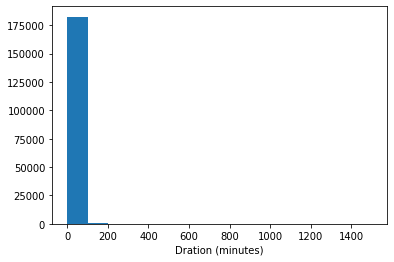

In [ ]:
# plot distribution of duration in minutes
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, ford['duration_in_minutes'].max()+binsize, binsize)
plt.hist(data=ford,x='duration_in_minutes',bins=bins)
plt.xlabel('Dration (minutes)');

The histogram is a right skewed distribution with a long tail, there is more data points in values less than 200.

In [ ]:
np.log10(ford['duration_in_minutes'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_in_minutes, dtype: float64

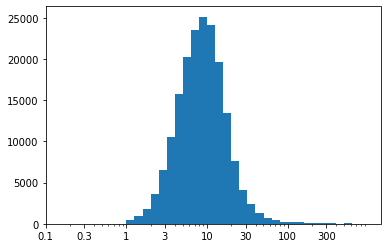

In [ ]:
# put the histogram on a log scale
bins = 10 ** np.arange(0,3 +0.1,0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels= ['{}'.format(v) for v in ticks]

plt.hist(data=ford,x='duration_in_minutes',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels);

The histogram shows a unimodal distribution of data. Most of the values are less than 100 minutes with peak around 10 minutes. 

## What is the age distribution of users?

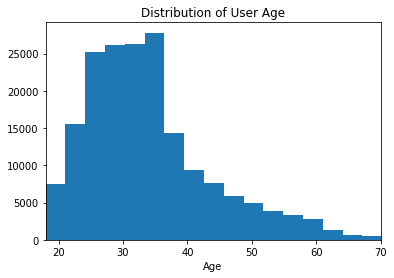

In [ ]:
# users age distribution
plt.hist(data=ford,x='age',bins=40)
plt.xlim(18,70)
plt.xlabel('Age')
plt.title('Distribution of User Age');


>The visualization shows that according to the dataset, bike users are predominantely young people, an average user is 34-35 years.

## What is the gender distribution?

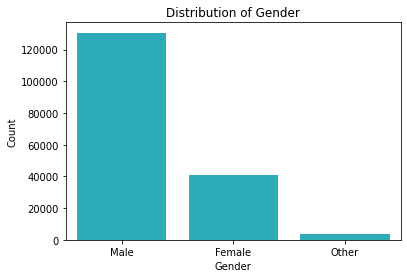

In [ ]:
# set order for the display of bars
freq = ford['member_gender'].value_counts()
gen_order = freq.index
# select custom color for bars
base_color = sb.color_palette()[9]
# plot bars
sb.countplot(data=ford,x='member_gender',color=base_color,order=gen_order)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count');

>There are more males than females in the dataset.

## What type of users utilize the bike platform most?

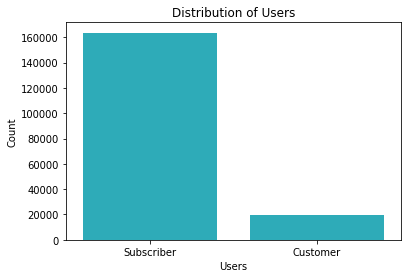

In [ ]:
# set order for the display of bars
freq2 = ford['user_type'].value_counts()
gen_order2 = freq2.index
# select customcolor for bars
base_color = sb.color_palette()[9]
# plot bars
sb.countplot(data=ford,x='user_type',color=base_color,order=gen_order2)
plt.title('Distribution of Users')
plt.xlabel('Users')
plt.ylabel('Count');

>The visualization shows that there are more subscribers than customers.

## What day is most trips started?

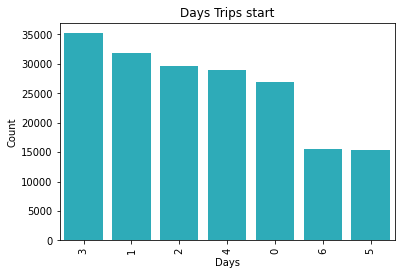

In [ ]:
# set order for the display of bars for days trips start
freq3 = ford['start_day'].value_counts()
gen_order3 = freq3.index
# select custom color for bars for days trips start
base_color = sb.color_palette()[9]
# plot bars for days trips start
sb.countplot(data=ford,x='start_day',color=base_color,order=gen_order3)
plt.title('Days Trips start')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xticks(rotation=90);

>The visualization shows that trips are more frequently started on Wenesdays.

## What hour of the day are trips likely to start?

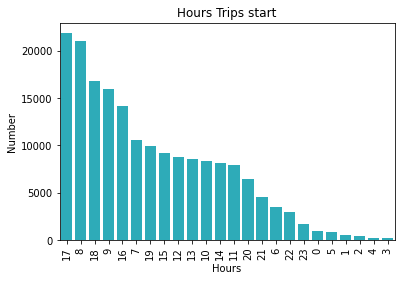

In [ ]:
# set order for the display of bars for days trips start
freq4 = ford['hour_start'].value_counts()
gen_order4 = freq4.index
# select custom color for bars for days trips start
base_color = sb.color_palette()[9]
# plot bars for days trips start
sb.countplot(data=ford,x='hour_start',color=base_color,order=gen_order4)
plt.title('Hours Trips start')
plt.xlabel('Hours')
plt.ylabel('Number')
plt.xticks(rotation=90);

>The data shows that trips are usually started in the evening by 5:00 pm.

## What is the distribution of bike sharing for all users?

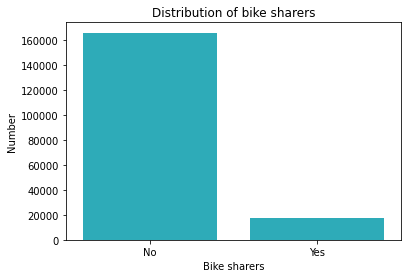

In [ ]:
# set custom color
base_color = sb.color_palette()[9]
# plot bars for bike sharers
sb.countplot(data=ford,x='bike_share_for_all_trip',color=base_color)
plt.title('Distribution of bike sharers')
plt.xlabel("Bike sharers")
plt.ylabel('Number');

The visualization shows that greater number of bike users did not share bikes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip duration in minutes has a right skewed long tail distribution. I put a logarithimic transformation, after the transformation the distribution became unimodal most of the values are less than 100 minutes with peak around 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distributions with age,user type,hour trip began, day trip started, and bike share.

## Bivariate Exploration



## What is the correlation between the hour trip started and trip duration in minutes?

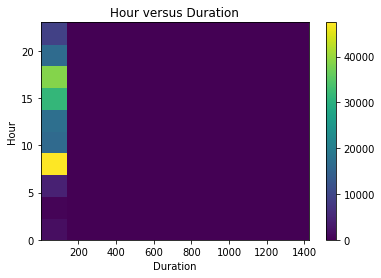

In [ ]:
# visualize duration and minutes  trip started
plt.hist2d(data= ford, x='duration_in_minutes',y='hour_start')
plt.colorbar()
plt.title('Hour versus Duration')
plt.xlabel('Duration')
plt.ylabel('Hour');


There is a positive correlation between the time of the day trip started and trip duration. Trips started after the 5th hour, just before the 10th hour of the day have a positive correlation with duration.Trips started before the 20th hour is also has a positive correlation with duration.

## What is the relationship between the day of the week that trip started and trip duration?

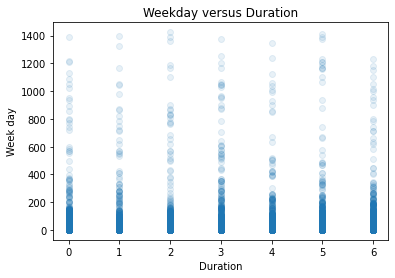

In [ ]:
# visualize day and trip duration
plt.scatter(data=ford,x='start_day',y='duration_in_minutes',alpha=1/10)
plt.title('Weekday versus Duration')
plt.xlabel('Duration')
plt.ylabel('Week day');

The visualization shows that trips started on the third day of the week are more likely to have longer duration.

## What is the correlation between gender and trip duration?

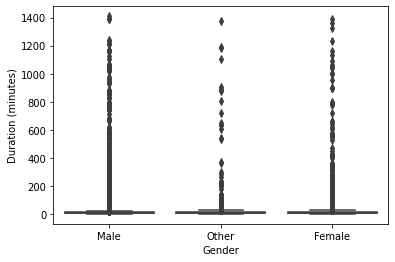

In [ ]:
# visualize gender and duration
sb.boxplot(data = ford, x = 'member_gender', y = 'duration_in_minutes')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.show()


>The box is not visible because of extreme outliers. The outliers will be dropped.

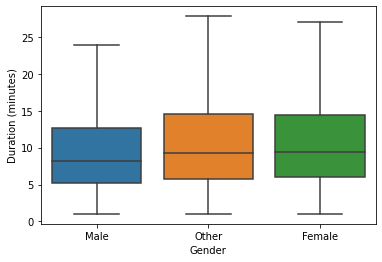

In [ ]:
# parameter for dropping outliers
showfliers = False
# visualize gender and duration
sb.boxplot(data = ford, x = 'member_gender', y = 'duration_in_minutes',showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)');

> I followed this link as a guide to remove outliers
[link text](https://stackoverflow.com/questions/53488148/box-whisker-plot-using-seaborn-does-not-show-the-box-and-whiskers)
Though from the earlier distribution there are more males in the dataset, this distribution is showing that females and gender labelled as other have higher trip duration.


##What is the relationship between user type and trip duration?

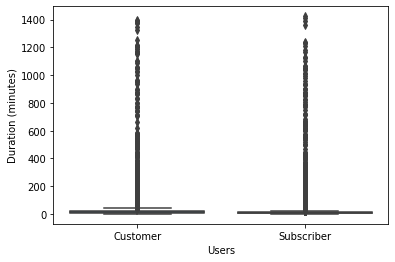

In [ ]:
# visualize user type and trip duration
sb.boxplot(data = ford, x = 'user_type', y = 'duration_in_minutes')
plt.xlabel('Users')
plt.ylabel('Duration (minutes)');

>The box is not visible because of extreme outliers. The outliers will be dropped.

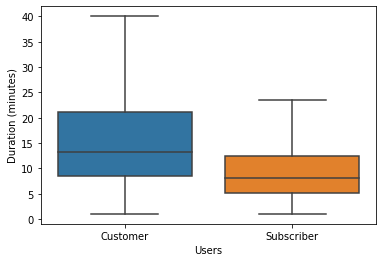

In [ ]:
# parameter for removing outlier
showfliers = False
# visualize without outliers
sb.boxplot(data = ford, x = 'user_type', y = 'duration_in_minutes',showfliers=False)
plt.xlabel('Users')
plt.ylabel('Duration (minutes)');

This shows that customers have a higher trip duration.

## What is the correlation between age and trip duration?

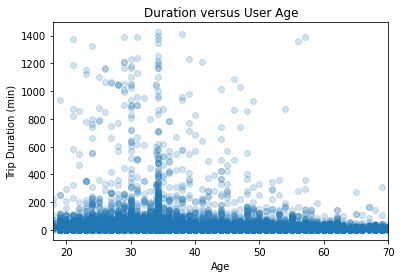

In [ ]:
# scatter plot of duration vs. age
plt.scatter(data = ford, x = 'age', y = 'duration_in_minutes', alpha = 1/5)
plt.xlabel('Age')
plt.xlim(18, 70)
plt.ylabel('Trip Duration (min)')
plt.title('Duration versus User Age');


> There is positive corrlation between age and trip duration. Young bike users are more likely to spend more time during their trip than older bike users.

##What is the relationship between bike sharers and trip duration?

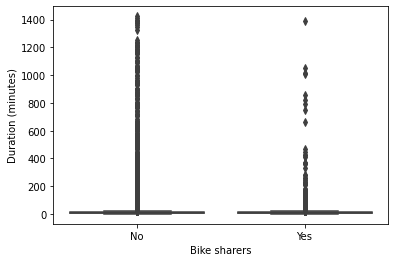

In [ ]:
# visualize bike sharers
sb.boxplot(data = ford, x = 'bike_share_for_all_trip', y = 'duration_in_minutes')
plt.xlabel('Bike sharers')
plt.ylabel('Duration (minutes)');

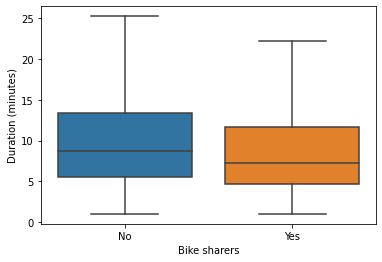

In [ ]:
# visualize bike sharers without outliers
showfliers = False
sb.boxplot(data = ford, x = 'bike_share_for_all_trip', y = 'duration_in_minutes',showfliers=False)
plt.xlabel('Bike sharers')
plt.ylabel('Duration (minutes)');

There is a correlation between bike sharers, non bike sharers, and trip duration. Non bike sharers are more likely to spend more time during their trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip duration is positively correlated with variables such as age, time of the day and day of the week that trips started.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I expected the male gender to have longer trip duration because the values of males in the dataset is higher, but it was the other way round, though females and other have less values in the dataset they have longer trip duration.

## Multivariate Exploration



## What is the relationship between age, trip duration and hour trip started?

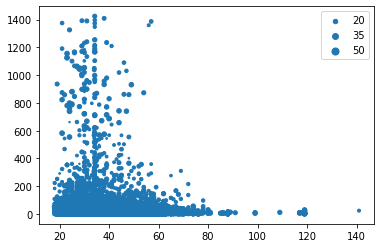

In [ ]:
# Visualize age,trip duration and hour trip started
plt.scatter(data=ford,x='age',y='duration_in_minutes',s ='hour_start')
# add legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj,sizes);

There is no correlation between age, hour trip started, and trip duration.

## What is the relation between gender, user type and trip duration?

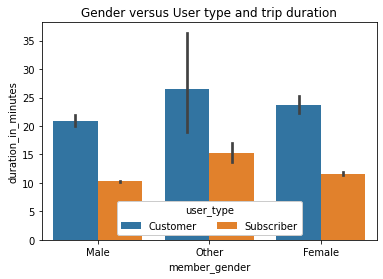

In [ ]:
# visualize gender, user type and trip duration
ax = sb.barplot(data= ford, x= 'member_gender',y = 'duration_in_minutes', hue = 'user_type')
ax.legend(loc = 8, ncol =3, framealpha = 1, title = 'user_type')
plt.title('Gender versus User type and trip duration');

This visualization shows that the other gender have more users who are customers and customers have longer trip duration, followed by the female gender.

## What is the relation between bike sharing, user type and trip duration?

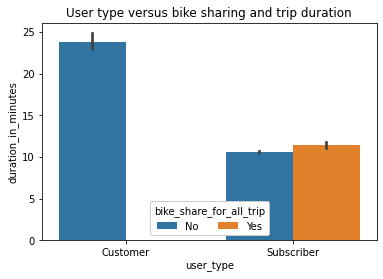

In [ ]:
# visualize gender, user type and trip duration
ax = sb.barplot(data= ford, x= 'user_type',y = 'duration_in_minutes', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol =3, framealpha = 1, title = 'bike_share_for_all_trip')
plt.title('User type versus bike sharing and trip duration');

The visualizations shows that subscribers are the one's who share bike and they have shorter trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The other gender have more users who are customers, and these users spend have the longest trip duration. Hour trip started did not have effect on the positive correlation between age and trip duration.

### Were there any interesting or surprising interactions between features?

> I found that all customer user type are not bike sharers and they have the longest trip duration.

## Conclusions
1.	Most trips last for a duration of 10 minutes.
2.	The average age of a bike user is 34-34 years, young bike users tend to have longer trip duration.
3.	The gender that has the highest values are males followed by females and lastly other. Other gender with the least values has longer trip duration with more users who are subscribers.
4.	Most users of the bike platform are subscribers, and subscribers are the ones that share bikes and they have shorter trip duration.
5.	Trips are mostly started on the third day of the week.
6.	The time of the day for the starting of trips the 17th hour, and there is a relationship between hour trip started and how long (duration) the trip will last.
7.	Most users are not bike sharers.

